# I. Call center data modeling

You are advising a client on the number of call center agents they need to handle their customer support load. We start by modeling the number of phone calls we expect to come into the call center during each hour of the day.

You are provided with a data set of the intervals between phone calls arriving during one day. Each value is a time in minutes indicating the amount of time that passed between receiving two consecutive phone calls.

## 0. Data Prep
### a, Loading the data

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load the data set containing durations between calls arriving at the call
# center during 1 day. All values are in minutes.
waiting_times_day = np.loadtxt('call_center.csv')

# Display some basic information about the data set.
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


Since the values are intervals between calls measured in minutes, this means

* we assume the first call happened at 00:00 (midnight),
* the second call happened at about 00:30 (30 minutes after midnight),
* the third call happened at about 00:33 (30 + 3.4 minutes),
* the fourth call happened at about 00:37, etc.

When we sum the values, we get about 1440 minutes (1 day).

You are told that the number of calls arriving varies quite a lot, depending on which hour of the day it is. The smallest number of calls usually occur around 3am or 4am. Most calls usually come in between 11am and 1pm.

### b, Data pre-processing
Since we expect different call rates during different hours, we split the data set into 24 separate series — one for each hour of the day.

In [3]:
# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

for hour, calls_in_hour in enumerate(waiting_times_per_hour):
    print(f'{hour:02}:00-{hour + 1:02}:00 - {len(calls_in_hour)} calls')

00:00-01:00 - 5 calls
01:00-02:00 - 4 calls
02:00-03:00 - 6 calls
03:00-04:00 - 8 calls
04:00-05:00 - 26 calls
05:00-06:00 - 53 calls
06:00-07:00 - 93 calls
07:00-08:00 - 173 calls
08:00-09:00 - 254 calls
09:00-10:00 - 345 calls
10:00-11:00 - 496 calls
11:00-12:00 - 924 calls
12:00-13:00 - 858 calls
13:00-14:00 - 382 calls
14:00-15:00 - 185 calls
15:00-16:00 - 207 calls
16:00-17:00 - 263 calls
17:00-18:00 - 419 calls
18:00-19:00 - 531 calls
19:00-20:00 - 400 calls
20:00-21:00 - 137 calls
21:00-22:00 - 51 calls
22:00-23:00 - 20 calls
23:00-24:00 - 16 calls


### c, Plot the number of calls per hour
Use Matplotlib to visualize the number of calls that arrive during each hour of the day, stored in the variable `waiting_times_per_hour`. The call numbers are shown in the output above. You should find an appropriate way to visualize it.

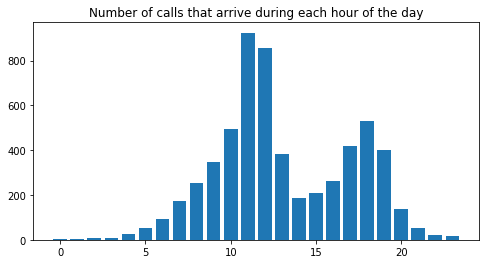

In [4]:
num_calls = []
for i in waiting_times_per_hour:
    # get the number of calls for each hour
    num_calls.append(len(i))
plt.figure(None, figsize=(8,4))
plt.bar(range(24), num_calls)
plt.title('Number of calls that arrive during each hour of the day')
plt.show()

### c, Plot a histogram of the durations for one hour
Take the data for the 9th hour (so between 9am and 10am) and plot a histogram showing the distribution over waiting times between calls during that hour.

### d, Guess the distribution
What type of distribution best represents the data in your histogram?

* Identify a type of distribution. **In class you will use this distribution as your likelihood function in a Bayesian inference problem.**
* Guess what the parameters of the distribution are. (This is just a guess for now. In class we will infer the values of the parameters.)
* Plot the pdf of your best guess on top of your histogram, to see if they match.
* **Important:** You have to normalize your histogram so that it will have the same vertical scale as the plot of the pdf. You can normalize a histogram by using the argument `density=True` in the `hist` function.

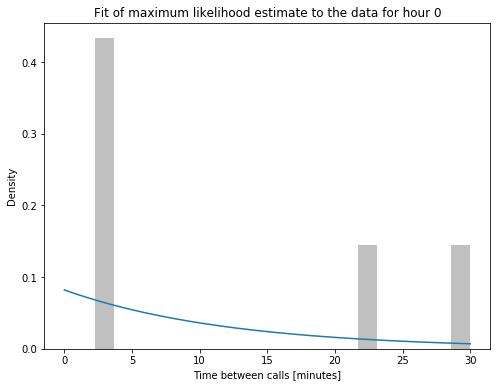

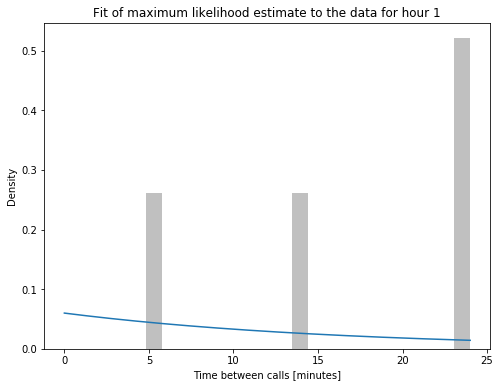

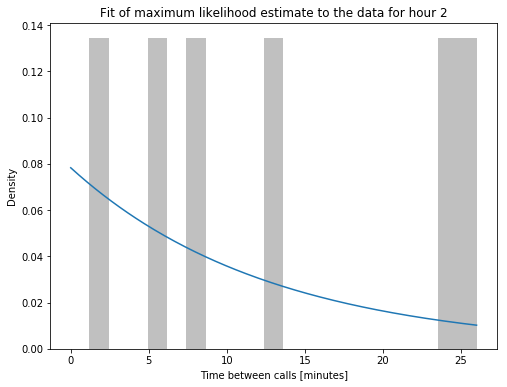

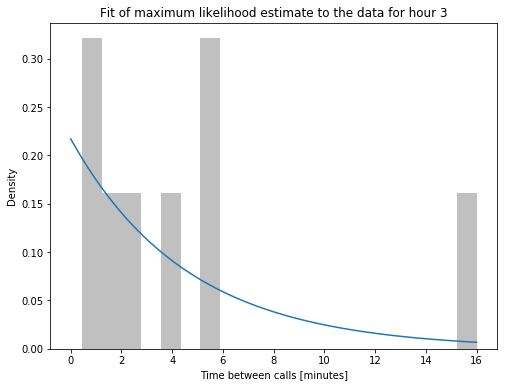

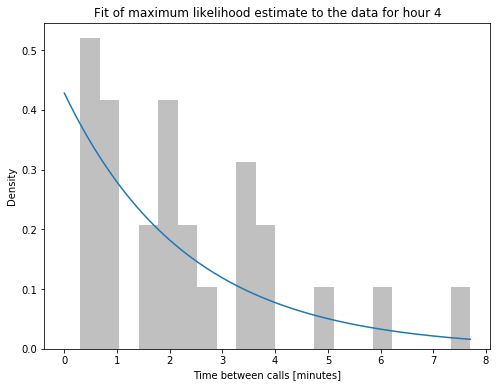

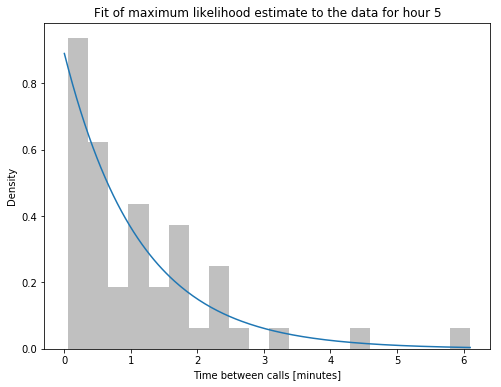

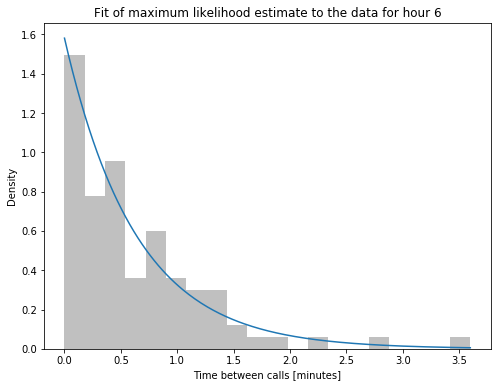

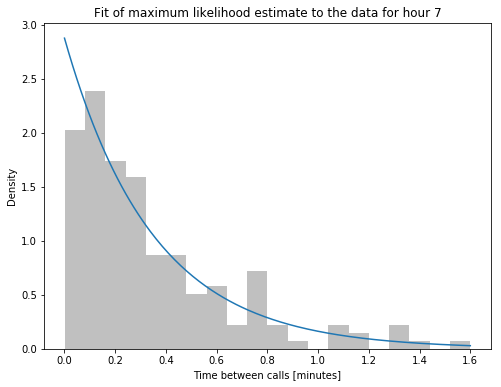

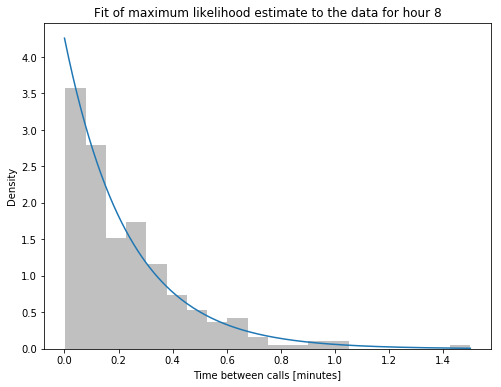

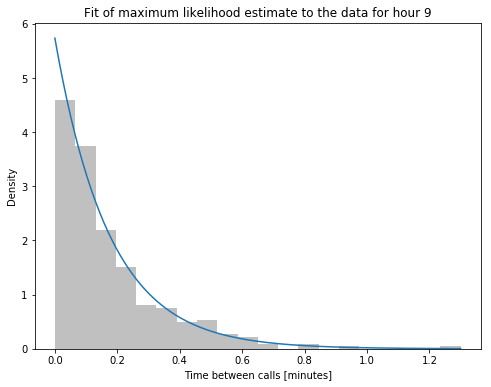

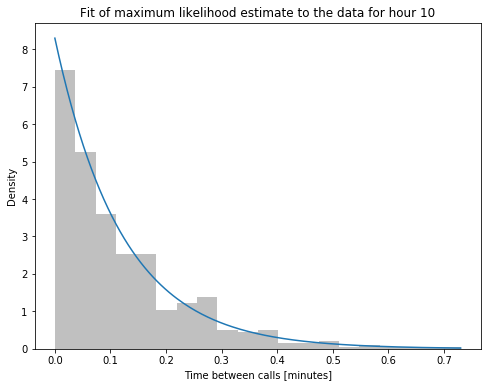

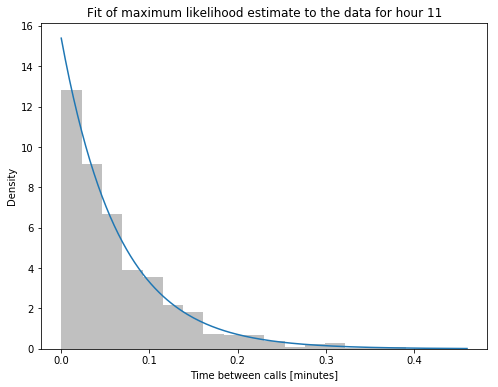

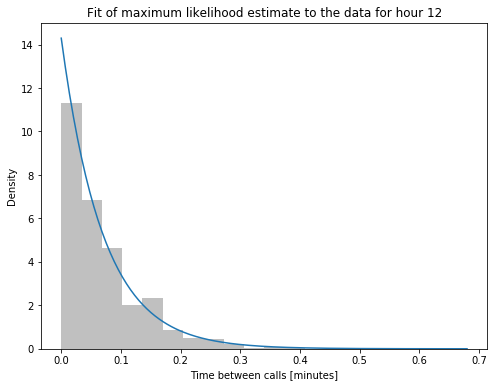

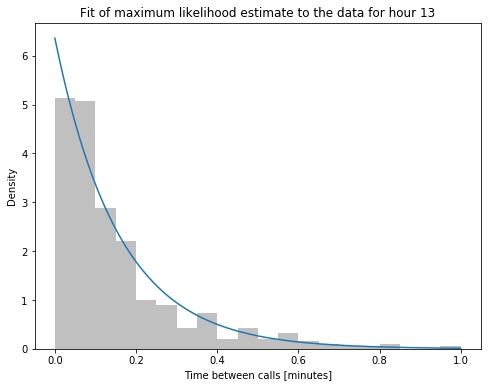

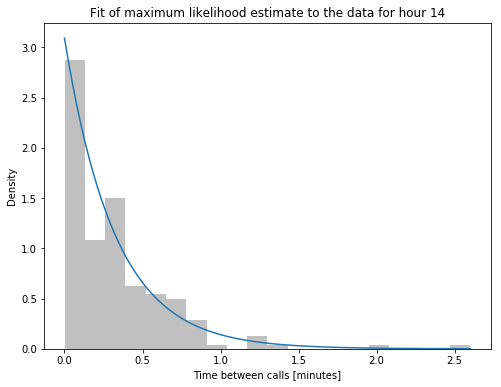

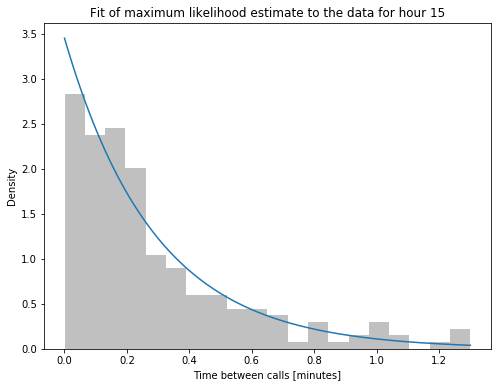

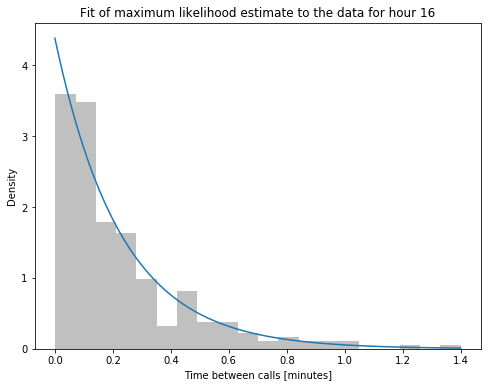

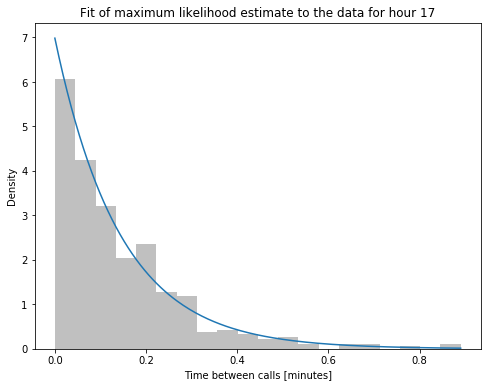

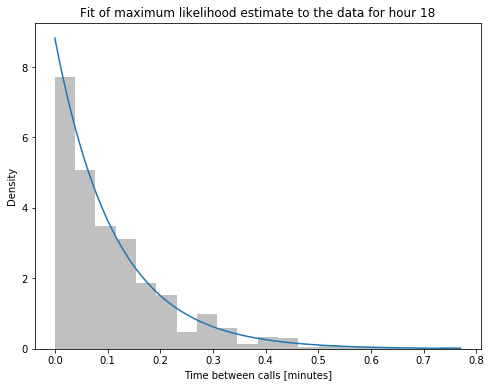

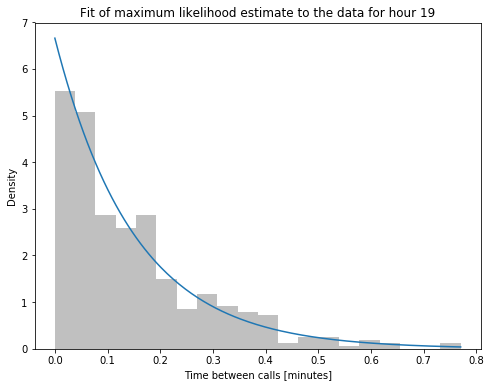

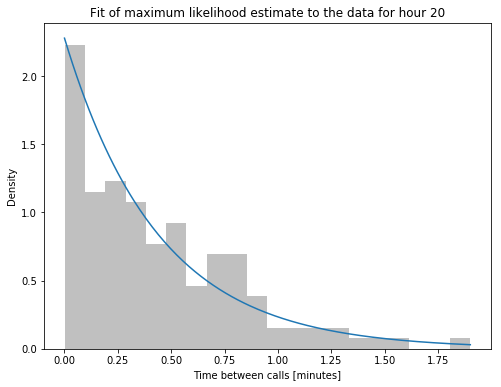

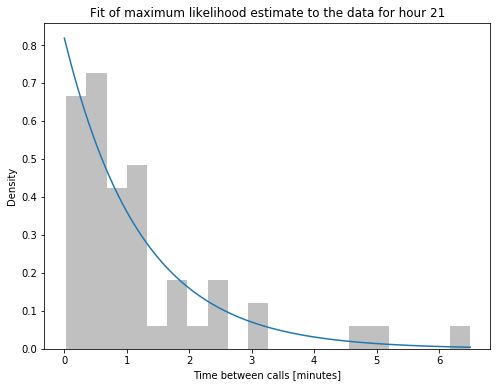

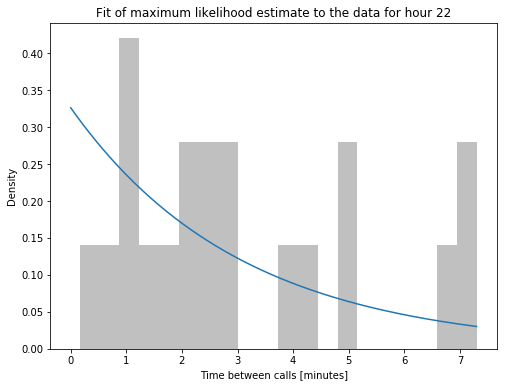

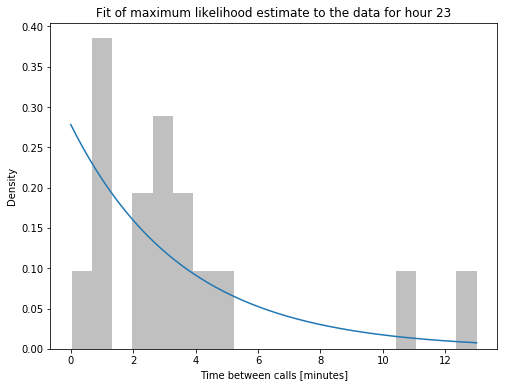

In [5]:
# Exponential distribution with maximum likelihood fit to the data
for hour_index in range(24):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambda_ = 1 / np.mean(waiting_times_hour)
    distribution = sts.expon(scale=1/lambda_)
    plt.figure(figsize=(8, 6))
    plt.hist(waiting_times_hour, bins=20, density=True, color='#c0c0c0')
    x = np.linspace(0, max(waiting_times_hour), 200)
    y = distribution.pdf(x)
    plt.plot(x, y)
    plt.xlabel('Time between calls [minutes]')
    plt.ylabel('Density')
    plt.title(f'Fit of maximum likelihood estimate to the data for hour {hour_index}')
    plt.show()

## 1. Compute mean and confidence interval for 24 hours

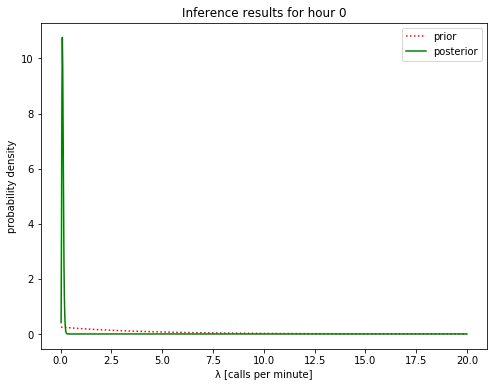

mean for hour 0 is 0.09844355612748837
98% confidence interval for hour 0 is [0.02, 0.2]


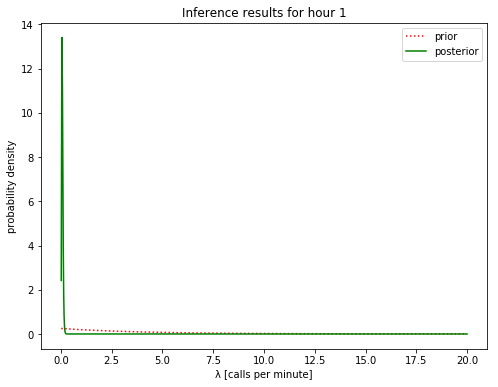

mean for hour 1 is 0.07583345264771416
98% confidence interval for hour 1 is [0.02, 0.16]


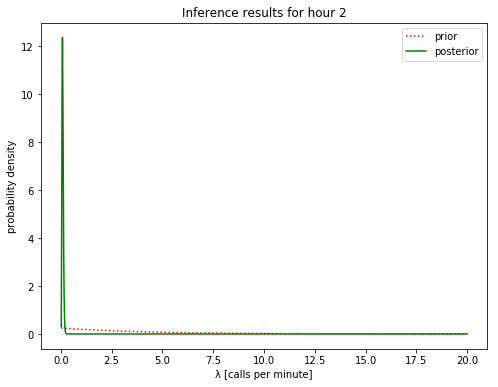

mean for hour 2 is 0.09130949558511654
98% confidence interval for hour 2 is [0.02, 0.18]


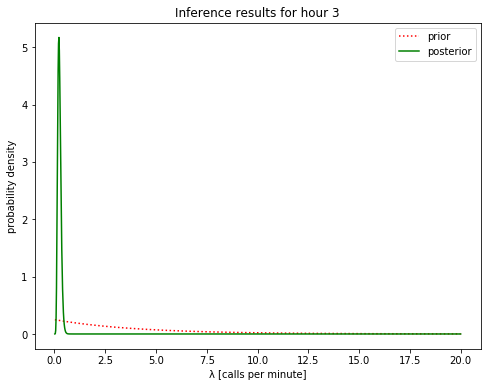

mean for hour 3 is 0.24265309377012
98% confidence interval for hour 3 is [0.08, 0.46]


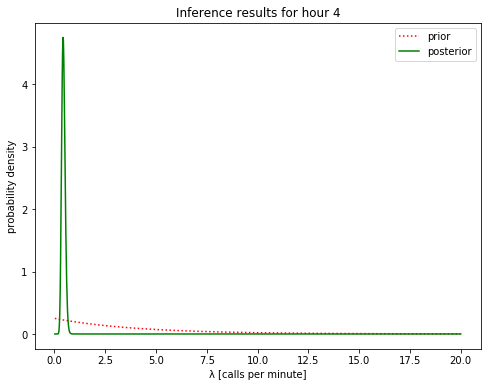

mean for hour 4 is 0.4423328964613368
98% confidence interval for hour 4 is [0.26, 0.66]


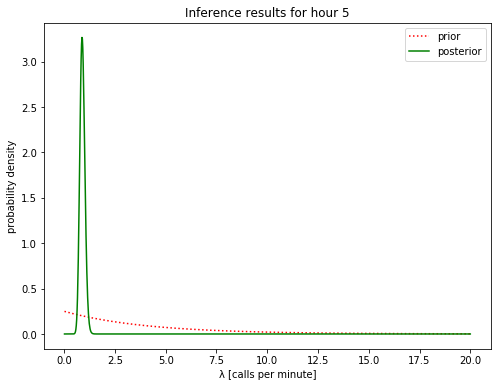

mean for hour 5 is 0.903312144529943
98% confidence interval for hour 5 is [0.64, 1.2]


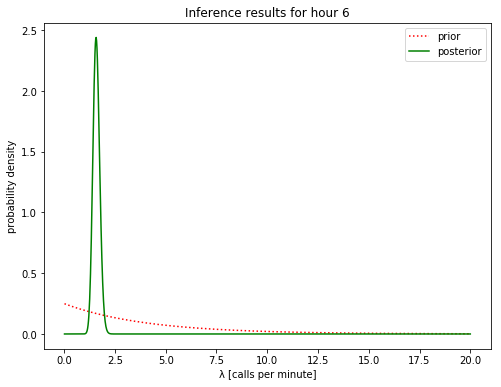

mean for hour 6 is 1.5911875564257962
98% confidence interval for hour 6 is [1.22, 1.98]


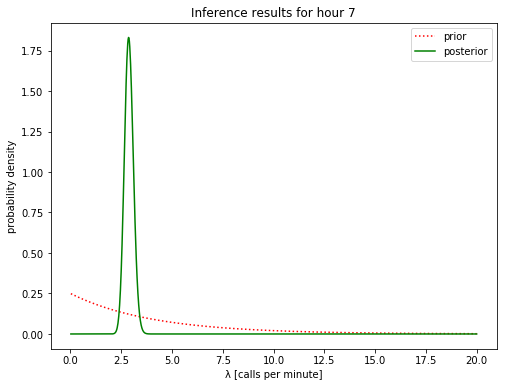

mean for hour 7 is 2.8810069616056153
98% confidence interval for hour 7 is [2.38, 3.4]


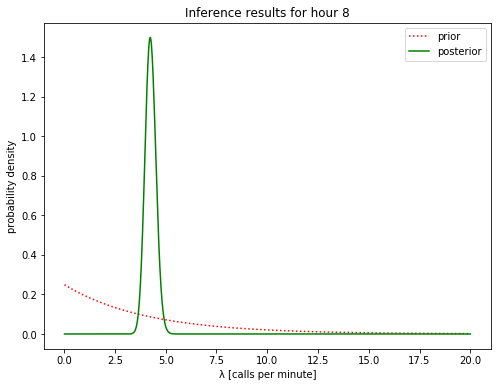

mean for hour 8 is 4.256924597345015
98% confidence interval for hour 8 is [3.66, 4.9]


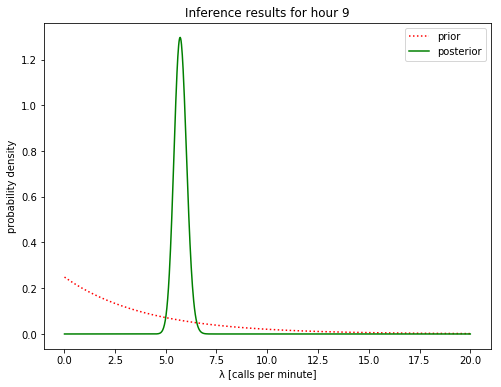

mean for hour 9 is 5.728695915357027
98% confidence interval for hour 9 is [5.0200000000000005, 6.46]


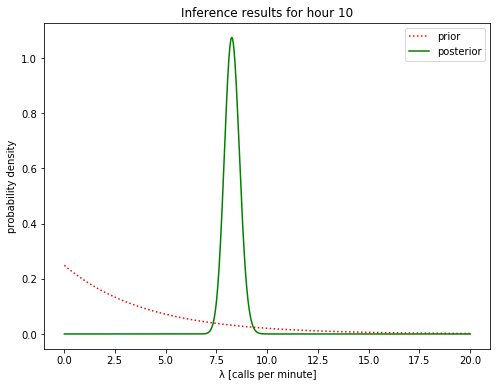

mean for hour 10 is 8.2794764772077
98% confidence interval for hour 10 is [7.42, 9.16]


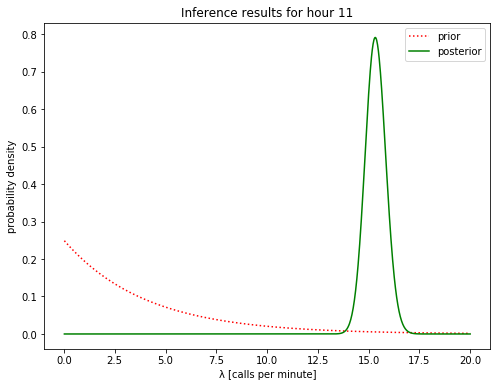

mean for hour 11 is 15.342752954309281
98% confidence interval for hour 11 is [14.18, 16.54]


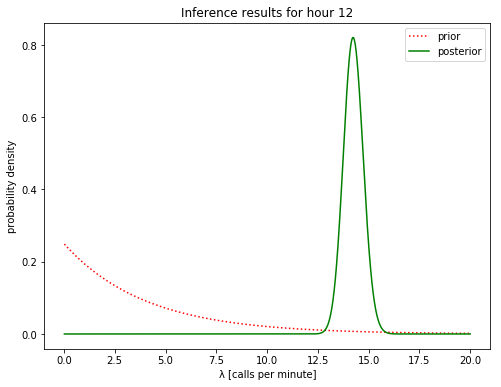

mean for hour 12 is 14.25068838306916
98% confidence interval for hour 12 is [13.14, 15.4]


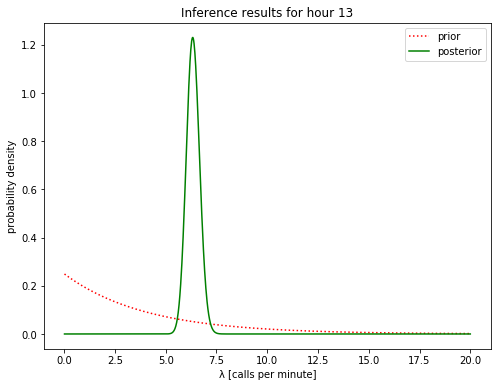

mean for hour 13 is 6.349423180600142
98% confidence interval for hour 13 is [5.6000000000000005, 7.12]


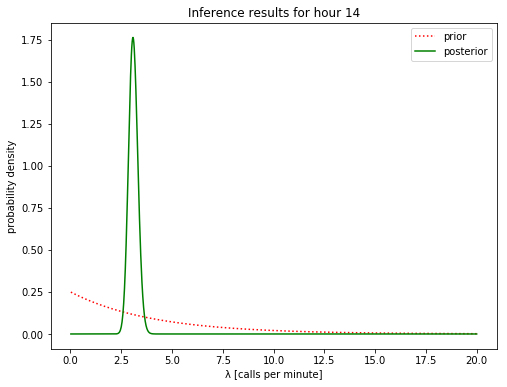

mean for hour 14 is 3.094053744378927
98% confidence interval for hour 14 is [2.58, 3.64]


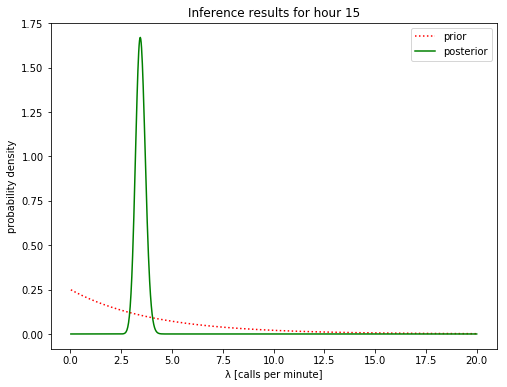

mean for hour 15 is 3.4522059513043106
98% confidence interval for hour 15 is [2.9, 4.0200000000000005]


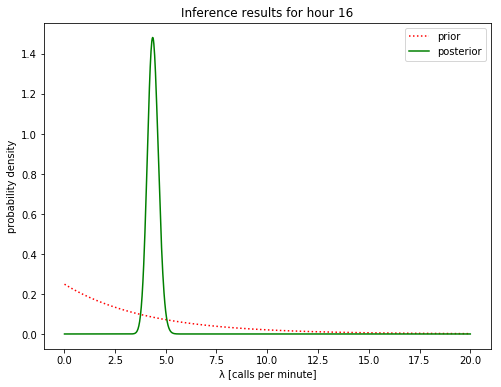

mean for hour 16 is 4.379532982528318
98% confidence interval for hour 16 is [3.7600000000000002, 5.0200000000000005]


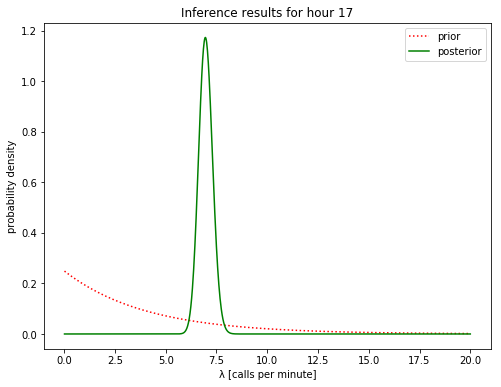

mean for hour 17 is 6.972251600671262
98% confidence interval for hour 17 is [6.2, 7.78]


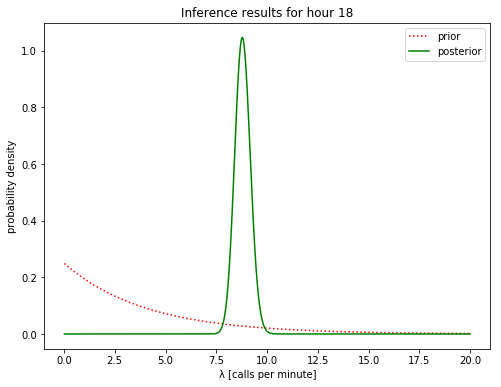

mean for hour 18 is 8.797216818562106
98% confidence interval for hour 18 is [7.92, 9.700000000000001]


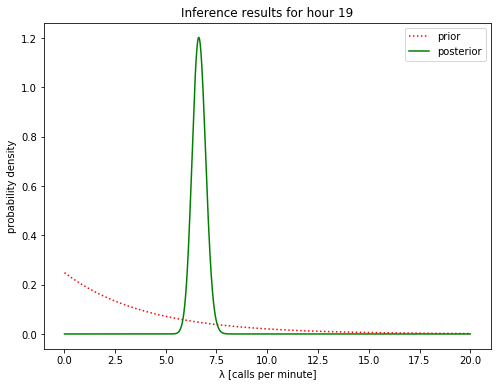

mean for hour 19 is 6.647526432206255
98% confidence interval for hour 19 is [5.88, 7.44]


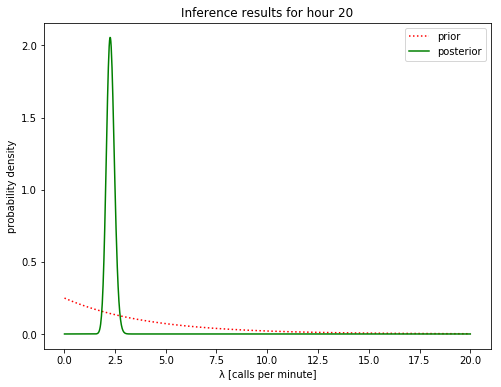

mean for hour 20 is 2.2851132488879116
98% confidence interval for hour 20 is [1.84, 2.7600000000000002]


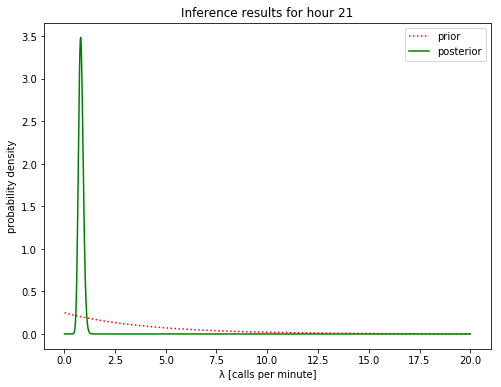

mean for hour 21 is 0.8305780503777536
98% confidence interval for hour 21 is [0.58, 1.12]


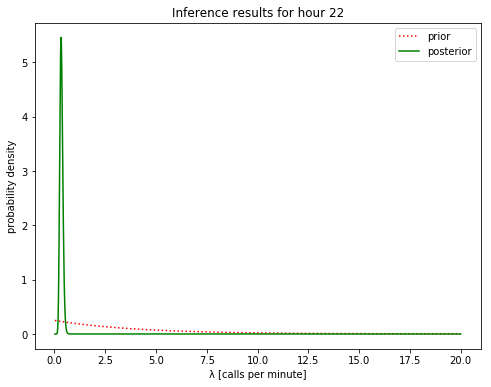

mean for hour 22 is 0.3409090909090915
98% confidence interval for hour 22 is [0.18, 0.52]


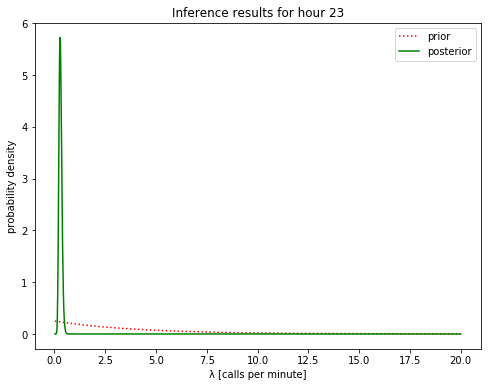

mean for hour 23 is 0.2943366172066144
98% confidence interval for hour 23 is [0.14, 0.48]


In [6]:
'''THE LIKELIHOOD FUNCTION

This function takes 2 inputs, namely the parameter (λ) value at which to
compute the likelihood and a value from the data set. You need to evaluate
the exponential distribution of the datum given the parameter value.'''

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

'''THE PRIOR DISTRIBUTION

This function takes 1 input, namely the parameter value (λ) at which to
compute the prior probability density. You need to evaluate the distribution
Gamma(λ | α, β).
'''
def prior(lambda_):
    return sts.gamma(1, scale=1/0.25).pdf(lambda_)

'''THE POSTERIOR DISTRIBUTION

The function below is provided to help make computing the posterior easier. It
follows the same pattern as in the previous class, where we multiple the prior
and the likelihood evaluated at various values of the parameter (λ).

You will see the function uses the logarithms of various distributions. This
is for numerical reasons. When you multiply lots of likelihood values, the
result can become very large or very small, causing numerical overflow or
underflow in Python. Taking logarithms avoids this problem.
'''

def compute_posterior(parameter_values, data):
    # get the log of prior distribution
    log_prior = np.log(prior(parameter_values))
    # get the log of likelihood distribution
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    # get the log of unnormalized posterior
    unnormalized_log_posterior = log_prior + log_likelihood
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    # get the unnormalize posterior
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    # get area under posterior curve
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    # get the posterior
    posterior = unnormalized_posterior / area
    return posterior

def compute_percentile(parameter_values, distribution_values, percentile):
    '''
    Compute the parameter value at a particular percentile of the given
    probability distribution values. This function uses the cumulative trapezoid
    integrator in SciPy.

    Inputs:

        parameter_values (array of float) This is the list of parameter values
          at which the probability distribution has been evaluated.

        distribution_values (array of float) This is the list of values of the
          probability density function evaluated at the parameter values above.

        percentile (float) This is the value between 0 and 1 of the percentile
          to compute.

    Returns: (float) The parameter value at the given percentile.
    '''
    # integrate over lambas from 0 to each value in lambdas list
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    # find the index of the percentile
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    # map that index onto lambdas list to find the lambda at that percentile
    return lambdas[percentile_index]

# find the expected value of the posterior distribution
def mean_post(para, post):
    # integrate x*f(x) over all values of x
    return sp.integrate.trapz(para*post, para)

# lambda values
lambdas = np.linspace(0, 20, 1001)[1:]
# confidence intervals for posterior
CI_ls = []
# mean for posterior
mean_ls = []

# find the posterior for each hour of the day
for hour_index in range(24):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    # get the posterior distribution
    posterior = compute_posterior(lambdas, waiting_times_hour)
    # YOU NEED TO PLOT THE PRIOR AND POSTERIOR ON THE SAME AXES.
    # set up and plot
    plt.figure(figsize=(8, 6))
    plt.plot(lambdas, prior(lambdas), color='red', linestyle=':', label='prior')
    plt.plot(lambdas, posterior, label='posterior', color='green')
    plt.xlabel('λ [calls per minute]')
    plt.ylabel('probability density')
    plt.title(f'Inference results for hour {hour_index}')
    plt.legend()
    plt.show()
    # find the 98% confidence intervals
    CI = [compute_percentile(lambdas, posterior, p) for p in [0.01, 0.99]]
    # find the mean
    mean = mean_post(lambdas, compute_posterior(lambdas, waiting_times_hour))
    mean_ls.append(mean)
    CI_ls.append(CI)
    print(f'mean for hour {hour_index} is {mean}')
    print(f'98% confidence interval for hour {hour_index} is {CI}')

## 2. Synthesize and visualize the results

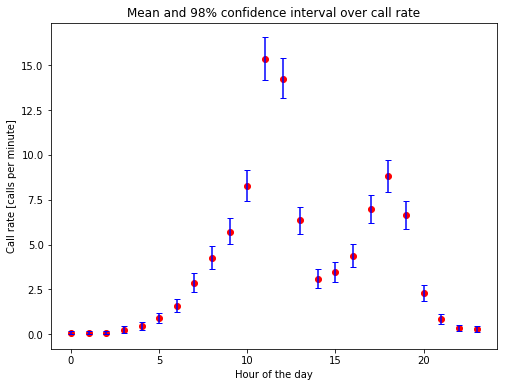

In [7]:
# transpose the confidence interval array
CI_ls2 = [[i[j] for i in CI_ls] for j in [0, 1]]
# get the error bar values
err_ls2 = [list(np.array(mean_ls)-np.array(CI_ls2[0])), list(np.array(CI_ls2[1])-np.array(mean_ls))]
# plot
plt.figure(figsize=(8, 6))
plt.scatter(range(24), mean_ls, color='red')
plt.errorbar(range(24), mean_ls, fmt='none', yerr = err_ls2, capsize=3, color='blue')
plt.xlabel('Hour of the day')
plt.ylabel('Call rate [calls per minute]')
plt.title('Mean and 98% confidence interval over call rate')
plt.legend()
plt.show()

## 3. Summary to the client
In general, the peak hours when you should expect to receive a lot of calls (about 15 calls per minute on average) are between 11 AM and 1 PM. These numbers may fluctuate but not too much, i.e., for 98% of the time, they should lie between 13 and 17 calls per minute. Some other busy hours are around 9 AM - 11 AM, 1 PM - 2PM, and 5 PM - 8 PM. On average, you should expect to get 6 to 9 calls per minute. Early morning and at night (0 AM - 6 AM and 8 PM - 0 AM) are when it is the least busy with below 2.5 calls per minute. Therefore, if you decide to hire people to take these calls, make sure many of them are on shift between 11 AM and 1 PM.

# II. Stretch goal

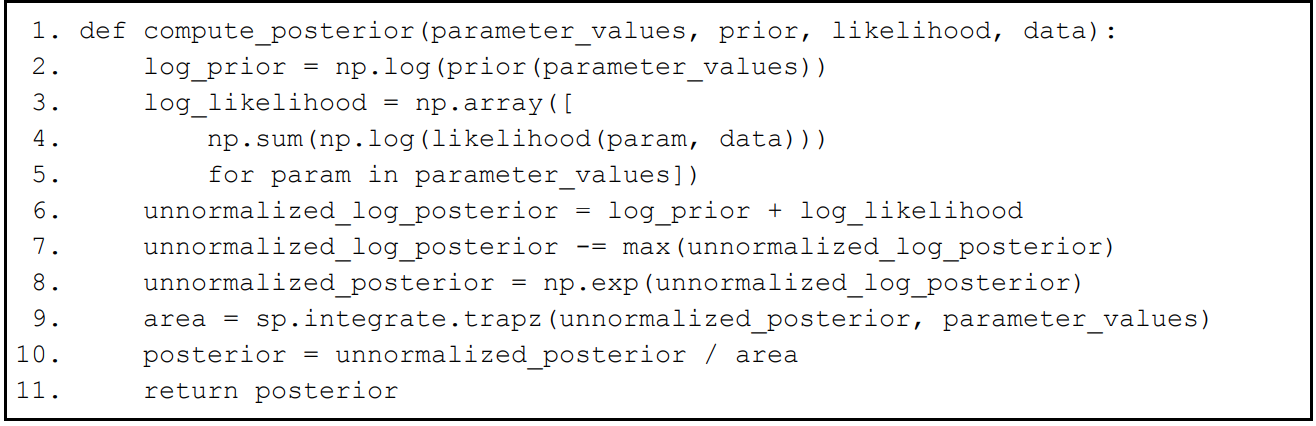

In [8]:
from IPython.display import Image
Image("posterior.png")

## 1. How does compute_posterior() work?
- compute_posterior() takes in two main parameters: parameter_values, which in this case is a list of lambdas for which we want to get the posterior distribution and data, which in this case is the list of calls during each hour of the day. It also takes in 2 other functions, prior() and likelihood(), because in Bayesian statistics, the posterior is built on the prior and the likelihood.
- Line 2: get the log of the prior distribution.
- Line 3: get the log of the likelihood function.
- We get the log of these values for a couple of reasons:
     + When we multiply a lot of numbers smaller or bigger than 1 together, the result becomes very small or very big very fast. When we take the log, it is easier to visualize and compare the numbers. Also, due to computational limitations, if we don't take logs, as the products get really small near 0 or really big near infinity, it is impossible for the program to distinguish between them.
     + Sometimes, we want to find the value of the parameters that maximize the likelihood of seeing the data. One way to do it is to differentiate the likelihood function, which can be really challenging because it's a product with many terms. However, differentiating the log-likelihood function is easier because it is just a sum of many logs.
- Line 6: in the formula for Bayesian theorem, the numerator is the product between the prior and the likelihood. Since we are dealing with log, we have to take sums instead of products. line 6 is equivalent to multiplying prior() and likelihood().
- Line 7: subtract all the log values from the biggest log values. This is equivalent to divide all the products of prior() and likelihood() (joint probability of the data and the parameter) by the biggest one, to make sure that every value is smaller than or equal to one. 
- Line 8: get the actual unnormalized posterior by exponentialize the unnormalized log posterior.
- Line 9: get the area under the posterior curve by integrating all the posterior values over lambdas using trapezoid method. This area represents the marginal or the evidence that tells us about the probability of seeing data irrespective of the lambdas.
- Line 10: get the normalized posterior, the true posterior distribution by dividing the unnormalized posterior (the product between the prior and the likelihood) by the area under the curve, to make sure that the area under the curve of the true posterior distribution equals to 1.
- Line 11: return the posterior distribution.

## 2. What does np.sum() do?
- Normally, to get the likelihood of many independent events, we multiply their probability together. In this case, for each hypothetical value of the parameter (lambda), the likelihood of seeing the actual data (the lengths of the calls during a certain hour) is different, and independent. So to get the overall likelihood, we just multiply them together, i.e., the product of P(data | lambda_1), P(data | lambda_2), etc. 
- Because we are taking the log of the likelihood, so we take the sum of all those log values, which is equivalent to taking the product of all the likelihood values, using np.sum()

## 3. What is the subtraction in line 7 for?
- Line 7 subtracts all the log values from the biggest log values. This is equivalent to divide all the products of prior() and likelihood() (joint probability of the data and the parameter) by the biggest one, to make sure that every value is smaller than or equal to one.
- Also, if we don't do this, the numbers can get really big or really small, potentially resulting in an error in Python.
- In this particular case, this line does not matter much, because our ultimate outcome is not the unnormalized log posterior or even the unnormalized posterior.

## 4. What is the division in line 10 for?
- Line 7 does not normalize the posterior. It only makes sure the biggest density value equals 1, it does not make sure the area under the posterior curve equals to 1.
- Line 10 normalizes the posterior. It divides the unnormalized posterior (usually obtained by multiplying the prior and the likelihood) by the area under the posterior curve, to make sure that that area becomes one.

## 5. Not taking logarithms?

### a, Example 1
The following example shows us that there are situations when not taking logs does not show any difference between the numbers, because they are either so small that Python sees them all as zero. But if we do take logs, we can clearly see the difference. 

In [9]:
x = [i for i in range(5)]
a = [(1e-150), (1e-153), (1e-156), (1e-159), (1e-162)]
b = [(1e-200), (1e-203), (1e-206), (1e-209), (1e-212)]
c = [1/5 for i in range(5)]

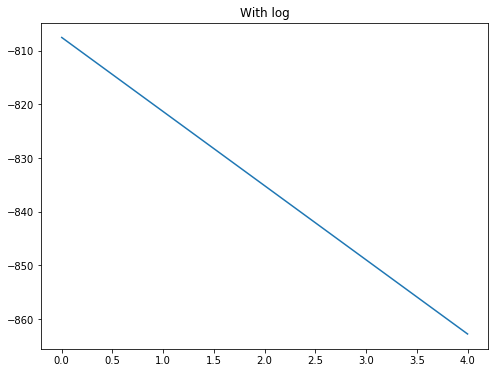

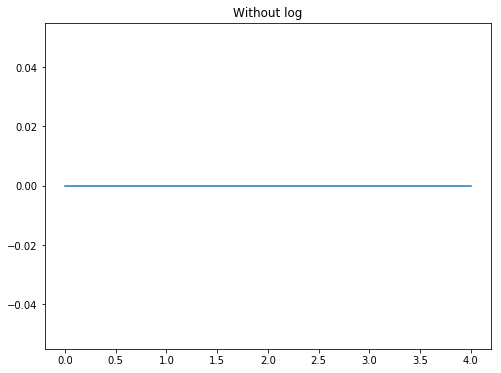

In [10]:
plt.figure(figsize=(8, 6))
plt.title('With log')
plt.plot(x, np.log(a)+np.log(b)+np.log(c))
plt.figure(figsize=(8, 6))
plt.title('Without log')
plt.plot(x, np.array(a)*np.array(b)*np.array(c))

### b, Example 2
Computing the posterior distribution of the same call center data set but without taking logs.

In [23]:
def compute_posterior_2(parameter_values, data):
    unnormalized_posterior = prior(parameter_values)*np.array([
        np.product(likelihood(param, data))
        for param in parameter_values])
    unnormalized_posterior /= max(unnormalized_posterior)
    # get area under posterior curve
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    # get the posterior
    posterior = unnormalized_posterior / area
    return posterior

In [30]:
CI_ls_2 = []
mean_ls_2 = []
for hour_index in range(24):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    # get the posterior distribution
    posterior_2 = compute_posterior_2(lambdas, waiting_times_hour)
    # YOU NEED TO PLOT THE PRIOR AND POSTERIOR ON THE SAME AXES.
    # set up and plot
#     plt.figure(figsize=(8, 6))
#     plt.plot(lambdas, prior(lambdas), color='red', linestyle=':', label='prior')
#     plt.plot(lambdas, posterior_2, label='posterior', color='green')
#     plt.xlabel('λ [calls per minute]')
#     plt.ylabel('probability density')
#     plt.title(f'Inference results for hour {hour_index}')
#     plt.legend()
#     plt.show()
    # find the 98% confidence intervals
    CI_2 = [compute_percentile(lambdas, posterior_2, p) for p in [0.01, 0.99]]
    # find the mean
    mean_2 = mean_post(lambdas, compute_posterior_2(lambdas, waiting_times_hour))
    mean_ls_2.append(mean_2)
    CI_ls_2.append(CI_2)
    print(f'mean for hour {hour_index} is {mean_2}')
    print(f'98% confidence interval for hour {hour_index} is {CI_2}')

mean for hour 0 is 0.0984435561274884
98% confidence interval for hour 0 is [0.02, 0.2]
mean for hour 1 is 0.07583345264771416
98% confidence interval for hour 1 is [0.02, 0.16]
mean for hour 2 is 0.0913094955851165
98% confidence interval for hour 2 is [0.02, 0.18]
mean for hour 3 is 0.2426530937701201
98% confidence interval for hour 3 is [0.08, 0.46]
mean for hour 4 is 0.4423328964613368
98% confidence interval for hour 4 is [0.26, 0.66]
mean for hour 5 is 0.9033121445299432
98% confidence interval for hour 5 is [0.64, 1.2]
mean for hour 6 is 1.5911875564257958
98% confidence interval for hour 6 is [1.22, 1.98]
mean for hour 7 is 2.8810069616056144
98% confidence interval for hour 7 is [2.38, 3.4]
mean for hour 8 is 4.256924597345015
98% confidence interval for hour 8 is [3.66, 4.9]
mean for hour 9 is 5.728695915357026
98% confidence interval for hour 9 is [5.0200000000000005, 6.46]
mean for hour 10 is 8.2794764772077
98% confidence interval for hour 10 is [7.42, 9.16]


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


mean for hour 11 is nan
98% confidence interval for hour 11 is [0.02, 0.02]
mean for hour 12 is nan
98% confidence interval for hour 12 is [0.02, 0.02]
mean for hour 13 is 6.349423180600141
98% confidence interval for hour 13 is [5.6000000000000005, 7.12]
mean for hour 14 is 3.0940537443789276
98% confidence interval for hour 14 is [2.58, 3.64]
mean for hour 15 is 3.4522059513043106
98% confidence interval for hour 15 is [2.9, 4.0200000000000005]
mean for hour 16 is 4.379532982528318
98% confidence interval for hour 16 is [3.7600000000000002, 5.0200000000000005]
mean for hour 17 is 6.972251600671262
98% confidence interval for hour 17 is [6.2, 7.78]
mean for hour 18 is 8.797216818562108
98% confidence interval for hour 18 is [7.92, 9.700000000000001]
mean for hour 19 is 6.647526432206255
98% confidence interval for hour 19 is [5.88, 7.44]
mean for hour 20 is 2.2851132488879116
98% confidence interval for hour 20 is [1.84, 2.7600000000000002]
mean for hour 21 is 0.8305780503777536
98% c

In [34]:
# compare the two mean lists, obtained with and without log being used in the posterior function
print(np.array(mean_ls) - np.array(mean_ls_2))

[-2.77555756e-17  0.00000000e+00  4.16333634e-17 -8.32667268e-17
  0.00000000e+00 -2.22044605e-16  4.44089210e-16  8.88178420e-16
  0.00000000e+00  8.88178420e-16  0.00000000e+00             nan
             nan  8.88178420e-16 -4.44089210e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.77635684e-15  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.55111512e-17  1.66533454e-16]


In [36]:
# get the posterior for hour 11
print(compute_posterior_2(lambdas, waiting_times_per_hour[11]))

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


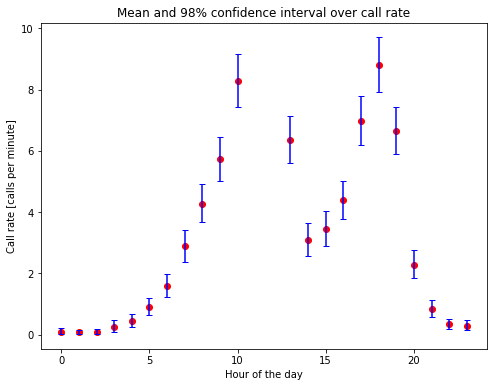

In [22]:
# transpose the confidence interval array
CI_ls2_2 = [[i[j] for i in CI_ls_2] for j in [0, 1]]
# get the error bar values
err_ls2_2 = [list(np.array(mean_ls_2)-np.array(CI_ls2_2[0])), list(np.array(CI_ls2_2[1])-np.array(mean_ls_2))]
# plot
plt.figure(figsize=(8, 6))
plt.scatter(range(24), mean_ls_2, color='red')
plt.errorbar(range(24), mean_ls_2, fmt='none', yerr = err_ls2_2, capsize=3, color='blue')
plt.xlabel('Hour of the day')
plt.ylabel('Call rate [calls per minute]')
plt.title('Mean and 98% confidence interval over call rate')
plt.legend()
plt.show()

- Obviously, the two graphs are different, for example, in the first one (using log), the peak hour is 11 AM, while in the graph above (not using log), the peak is 6 PM.
- I also got the difference between the two mean lists above, which shows that the means for the same hours are different. One explanation for this is that when doing with log and without log the computer shortened some long numbers (after many mathematical operations, the results could have been approximated multiple times), leading to the tiny discrepancies.
- Another thing I noticed was the posterior distribution for hour 11 couldn't be calculated, due to "overflow encountered in reduce". This could be because of the multiplication of many small numbers that lead to the overflow of memory.